# Homework 1 (CSE 840) Programming Question

For this question, you need to write a Python program that will factorize an input matrix into a product of 2 latent matrices using the alternating minimization (also known as block coordinate descent) algorithm described in the lecture. Use the template Jupyter notebook provided to write and execute your code. Rename the provided template notebook as *hw1_yourlastname.ipynb* before submitting it to D2L. Your submitted notebook must contain your code implementation as well as the results of executing each cell.  

You are allowed to use only the python standard library along with the numpy and matplotlib libraries in your implementation. Specifically, you may use the following functions in numpy library:

- np.random.seed - function to initialize the seed of the random number generator.
- np.random.rand - function to create a random matrix.
- np.zeros - function to create a vector/matrix of zeros.
- np.matmul or np.dot - function to multiply a pair of matrices.
- np.linalg.norm - function to compute Frobenius norm of a matrix.

In addition, you may use the matplotlib.pyplot library for plotting and the matplotlib.image library for loading and plotting images. Specifically, you should use the matplotlib.image.imread() function to load an image file into a numpy array and matplotlib.image.imshow() to plot the image. 

You're prohibited from using any other libraries without approval from the instructor. In particular, functions that automatically perform the matrix factorization must not be used. If you are unsure whether a function can be used, please post your question to Piazza at least 48 hours before the deadline to ensure you will get a response on time.

Follow the step-by-step instructions below to implement your code.

**Step 0** Generate some random matrix for testing your code

In [ ]:
import pandas as pd
import numpy as np

seed = 12345678
np.random.seed(seed)
A = np.random.rand(5,5)
print('Original matrix:\n', A)

Original matrix:
 [[0.24580423 0.59642861 0.35879163 0.37891011 0.02445137]
 [0.23830957 0.38793433 0.68054104 0.83934083 0.76073689]
 [0.2217416  0.06344161 0.77944375 0.72174137 0.19413884]
 [0.51146167 0.06880307 0.39414268 0.98172767 0.30490851]
 [0.781959   0.73470598 0.83827159 0.12159011 0.86783953]]


**Step 1 [5 points]** Write a function that factorizes the input matrix X into a product of its latent matrices W and H such that 
$$\|X - WH\|_F^2$$ 
is minimized. The function takes the following input arguments:
- X: input matrix
- k: number of components of the latent matrices. 
- lr: learning rate
- maxiter: maximum number of iterations
- random_state: seed for random number generator

The function should return the pair of latent matrices W and H. The pseudocode for the algorithm is given in the lecture notes. The function should  randomly initialize the matrices W and H. Use the random_state variable to set the seed of the random number generator. The number of columns in W and number of rows in H must be equal to k. In addition, the function should also plot the reconstructed error, $\|X - WH\|_F$ at each iteration. 

In [ ]:
import matplotlib.pyplot as plt

def factorize(X, k, lr = 0.01, maxiter = 100, random_state=1):
    (m, n) = X.shape
    np.random.seed(random_state)
    
    W = np.random.rand(m,k)
    H = np.random.rand(k,n)
    err = np.zeros(maxiter)
    
    for i in range(maxiter):
        W2 = W + 2*lr*(np.matmul(X,H.T) - np.matmul(np.matmul(W,H),H.T))
        H = H + 2*lr*(np.matmul(W.T,X) - np.matmul(np.matmul(W.T,W), H))
        W = W2
        err[i] = np.linalg.norm(X - np.matmul(W,H))

    plt.xlabel("Iteration")
    plt.ylabel("|X - WH|")
    plt.plot(np.arange(maxiter), err, color ="red")
    plt.show()
    
    return W, H

**Step 2** Execute the function on the randomly generated matrix by setting the number of components k=3 and maximum iteration to 500.

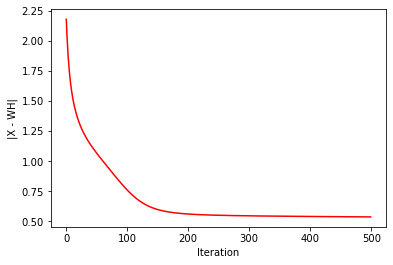

Product of factorized matrix: 
 [[0.21553477 0.49902876 0.50083107 0.31675367 0.01634939]
 [0.48396882 0.29589008 0.69563937 0.80599109 0.64346915]
 [0.26013769 0.21589537 0.56091931 0.81822694 0.21048201]
 [0.29306237 0.04069832 0.52629027 0.94435869 0.38629994]
 [0.70454677 0.78757778 0.80194514 0.14663935 0.9097321 ]]


In [ ]:
U, V = factorize(A, 3, maxiter=500)
print('Product of factorized matrix: \n', np.matmul(U,V))

**Step 3 [1 point]** Load the image data named *monalisa.png* provided into a numpy 2d array (i.e., a matrix). Plot the grayscale image and display its size. You may refer to the example given at https://www.delftstack.com/howto/matplotlib/matplotlib-display-image-in-grayscale/ on how to use the imread() and imshow() function for loading and plotting an image. Note that the original image is already in grayscale (instead of RGB color). Therefore you do not have to perform any transformation on the raw image before plotting.

Size of image: (168, 201)


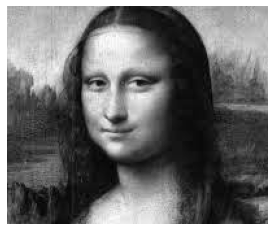

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('monalisa.png')
plt.imshow(img, cmap='gray')
plt.axis('off')
print('Size of image:', img.shape)

**Step 4 [1 point]** Apply the matrix factorization to decompose the matrix into a product of its latent matrices. Set the number of components k to 5, learning rate to 0.0001, and maximum iteration to 3000. Reconstruct the approximated matrix by multiplying W and H. Plot the reconstructed image.

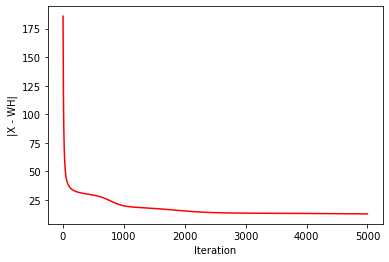

(-0.5, 200.5, 167.5, -0.5)

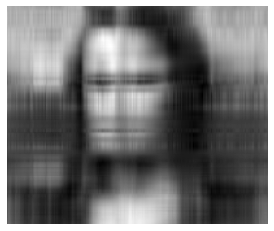

In [ ]:
W, H = factorize(img, 5, lr = 0.0001, maxiter=5000)
img2 = np.matmul(W,H)
plt.imshow(img2, cmap='gray')
plt.axis('off')

**Step 5 [1 point]** Repeat step 4 by setting the number of components k = 20, learning rate to 0.0001, and maximum iteration to 5000. Reconstruct the approximated matrix by multiplying W and H. Plot the reconstructed image.

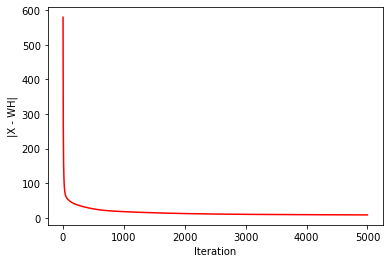

(-0.5, 200.5, 167.5, -0.5)

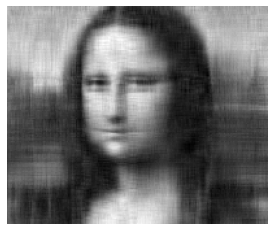

In [ ]:
W, H = factorize(img, 20, lr = 0.0001, maxiter=5000)
img2 = np.matmul(W,H)
plt.imshow(img2, cmap='gray')
plt.axis('off')